In [20]:
import pandas as pd
from finvader import finvader
data = pd.read_csv('general_financial_news1.csv',index_col=None)
data

,newscontents,label
0,Altia operating profit jumped to EUR 47 millio...,1
1,The agreement was signed with Biohit Healthcar...,1
2,Kesko pursues a strategy of healthy focused gr...,1
3,Vaisala headquartered in Helsinki in Finland d...,0
4,Also a six year historic analysis is provided ...,0
...,...,...
23310,LONDON MarketWatch Share prices ended lower...,-1
23311,Rinkuskiai beer sales fell by 6.5 per cent to ...,0
23312,Operating profit fell to EUR 35.4 mn from EUR ...,-1
23313,Net sales of the Paper segment decreased to EU...,-1


In [21]:
# use the classifier
import numpy as np
data['newscontents']=data['newscontents'].astype(str)
data['finvader'] = data['newscontents'].apply(finvader,use_sentibignomics = True, use_henry = True, indicator="compound")
data

,newscontents,label,finvader
0,Altia operating profit jumped to EUR 47 millio...,1,0.0207
1,The agreement was signed with Biohit Healthcar...,1,-0.1712
2,Kesko pursues a strategy of healthy focused gr...,1,0.6411
3,Vaisala headquartered in Helsinki in Finland d...,0,0.0000
4,Also a six year historic analysis is provided ...,0,0.0000
...,...,...,...
23310,LONDON MarketWatch Share prices ended lower...,-1,-0.6143
23311,Rinkuskiai beer sales fell by 6.5 per cent to ...,0,-0.3485
23312,Operating profit fell to EUR 35.4 mn from EUR ...,-1,-0.3270
23313,Net sales of the Paper segment decreased to EU...,-1,0.0374


In [22]:
# discretize compound indicator into 3 scores
conditions = [
    (data['finvader'] > 0.33),
    (data['finvader']> - 0.33) & (data['finvader'] < 0.33),
    (data['finvader'] < - 0.33)
]
values = [1, 0, -1]
data['finvader'] = np.select(conditions, values)
data

,newscontents,label,finvader
0,Altia operating profit jumped to EUR 47 millio...,1,0
1,The agreement was signed with Biohit Healthcar...,1,0
2,Kesko pursues a strategy of healthy focused gr...,1,1
3,Vaisala headquartered in Helsinki in Finland d...,0,0
4,Also a six year historic analysis is provided ...,0,0
...,...,...,...
23310,LONDON MarketWatch Share prices ended lower...,-1,-1
23311,Rinkuskiai beer sales fell by 6.5 per cent to ...,0,-1
23312,Operating profit fell to EUR 35.4 mn from EUR ...,-1,0
23313,Net sales of the Paper segment decreased to EU...,-1,0


In [23]:
# calculate true positives (TP), true negatives (TN), false positives (FP) and false negatives (FN)
data['finvader_correct'] = np.where((data['label'] == data['finvader']), 1, 0)
data['finvader_TP'] = np.where((data['label'] == 1) & (data['finvader'] == 1), 1, 0)
data['finvader_TN'] = np.where((data['label'] == -1) & (data['finvader'] == -1), 1, 0)
data['finvader_FP'] = np.where((data['label'] != 1) & (data['finvader'] == 1), 1, 0)
data['finvader_FN'] = np.where((data['label'] != -1) & (data['finvader'] == -1), 1, 0)

In [24]:
# print accuracy, precision, recall, F1 score
print("FinVADER accuracy is:",  round((((data['finvader_correct'].sum()) / len(data))) * 100, 2), "%")
print("FinVADER precision is:",  round((( data['finvader_TP'].sum() / ((data['finvader_TP'].sum() + data['finvader_FP'].sum())))) * 100, 2), "%")
print("FinVADER recall is:",  round((( data['finvader_TP'].sum() / ((data['finvader_TP'].sum() + data['finvader_FN'].sum())))) * 100, 2), "%")
print("FinVADER F1 score is:",  2 * round(
    (((data['finvader_TP'].sum() / ((data['finvader_TP'].sum() + data['finvader_FP'].sum()))) *
      (((data['finvader_TP'].sum() / ((data['finvader_TP'].sum() + data['finvader_FN'].sum())))))) /
     (((data['finvader_TP'].sum() / ((data['finvader_TP'].sum() + data['finvader_FP'].sum()))) +
       (((data['finvader_TP'].sum() / ((data['finvader_TP'].sum() + data['finvader_FN'].sum())))))))
     )* 100, 2), "%")

FinVADER accuracy is: 65.06 %
FinVADER precision is: 51.78 %
FinVADER recall is: 75.1 %
FinVADER F1 score is: 61.3 %


In [25]:
# baseline VADER
# discretize compound indicator into 3 scores
from nltk.sentiment.vader import SentimentIntensityAnalyzer
baseline = SentimentIntensityAnalyzer()

def sentiment_vader(sentence):

    sentiment_dict = baseline.polarity_scores(sentence)

    compound = sentiment_dict['compound']

    if sentiment_dict['compound'] > 0.33 :
        overall_sentiment = 1

    elif sentiment_dict['compound'] < - 0.33 :
        overall_sentiment = - 1

    else :
        overall_sentiment = 0

    return overall_sentiment

In [26]:
# use the classifier
data['vader'] = data['newscontents'].apply(sentiment_vader)
data

,newscontents,label,finvader,finvader_correct,finvader_TP,finvader_TN,finvader_FP,finvader_FN,vader
0,Altia operating profit jumped to EUR 47 millio...,1,0,0,0,0,0,0,1
1,The agreement was signed with Biohit Healthcar...,1,0,0,0,0,0,0,1
2,Kesko pursues a strategy of healthy focused gr...,1,1,1,1,0,0,0,1
3,Vaisala headquartered in Helsinki in Finland d...,0,0,1,0,0,0,0,0
4,Also a six year historic analysis is provided ...,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
23310,LONDON MarketWatch Share prices ended lower...,-1,-1,1,0,1,0,0,-1
23311,Rinkuskiai beer sales fell by 6.5 per cent to ...,0,-1,0,0,0,0,1,0
23312,Operating profit fell to EUR 35.4 mn from EUR ...,-1,0,0,0,0,0,0,1
23313,Net sales of the Paper segment decreased to EU...,-1,0,0,0,0,0,0,1


In [27]:
# calculate true positives (TP), true negatives (TN), false positives (FP) and false negatives (FN)
data['vader_correct'] = np.where((data['label'] == data['vader']), 1, 0)
data['vader_TP'] = np.where((data['label'] == 1) & (data['vader'] == 1), 1, 0)
data['vader_TN'] = np.where((data['label'] == -1) & (data['vader'] == -1), 1, 0)
data['vader_FP'] = np.where((data['label'] != 1) & (data['vader'] == 1), 1, 0)
data['vader_FN'] = np.where((data['label'] != -1) & (data['vader'] == -1), 1, 0)

In [28]:
# print accuracy, precision, recall, F1 score
print("VADER accuracy is:",  round((((data['vader_correct'].sum()) / len(data))) * 100, 2), "%")
print("VADER precision is:",  round((( data['vader_TP'].sum() / ((data['vader_TP'].sum() + data['vader_FP'].sum())))) * 100, 2), "%")
print("VADER recall is:",  round((( data['vader_TP'].sum() / ((data['vader_TP'].sum() + data['vader_FN'].sum())))) * 100, 2), "%")
print("VADER F1 score is:",  2 * round(
    (((data['vader_TP'].sum() / ((data['vader_TP'].sum() + data['vader_FP'].sum()))) *
      (((data['vader_TP'].sum() / ((data['vader_TP'].sum() + data['vader_FN'].sum())))))) /
     (((data['vader_TP'].sum() / ((data['vader_TP'].sum() + data['vader_FP'].sum()))) +
       (((data['vader_TP'].sum() / ((data['vader_TP'].sum() + data['vader_FN'].sum())))))))
     )* 100, 2), "%")

VADER accuracy is: 55.67 %
VADER precision is: 38.49 %
VADER recall is: 69.9 %
VADER F1 score is: 49.64 %


In [29]:
# Finvader Prediction Outcome Statistics
total_TP = data['finvader_TP'].sum()
total_TN = data['finvader_TN'].sum()
total_FP = data['finvader_FP'].sum()
total_FN = data['finvader_FN'].sum()

print(f"Total True Positives: {total_TP}")
print(f"Total True Negatives: {total_TN}")
print(f"Total False Positives: {total_FP}")
print(f"Total False Negatives: {total_FN}")

Total True Positives: 3317
Total True Negatives: 1146
Total False Positives: 3089
Total False Negatives: 1100


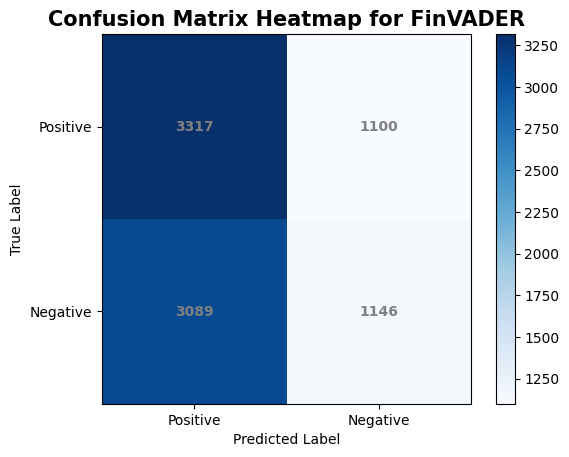

In [30]:
# Confusion Matrix for Finvader

import matplotlib.pyplot as plt
# Define confusion matrix
conf_matrix = np.array([[total_TP, total_FN], [total_FP, total_TN]]) 

# Plot heatmap
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')

# Add color bar
plt.colorbar()

# Add annotations
for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix[i])):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='grey', fontsize=10, fontweight='bold')
# Add labels
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap for FinVADER', fontsize=15, fontweight='bold')

# Customize tick marks
tick_marks = np.arange(len(conf_matrix))
plt.xticks(tick_marks, ['Positive', 'Negative'])
plt.yticks(tick_marks, ['Positive', 'Negative'])

# Show plot
plt.show()

In [31]:
# Finvader Prediction Outcome Statistics
total_TP_v = data['vader_TP'].sum()
total_TN_v = data['vader_TN'].sum()
total_FP_v = data['vader_FP'].sum()
total_FN_v = data['vader_FN'].sum()

print(f"Total True Positives: {total_TP_v}")
print(f"Total True Negatives: {total_TN_v}")
print(f"Total False Positives: {total_FP_v}")
print(f"Total False Negatives: {total_FN_v}")

Total True Positives: 2754
Total True Negatives: 657
Total False Positives: 4402
Total False Negatives: 1186


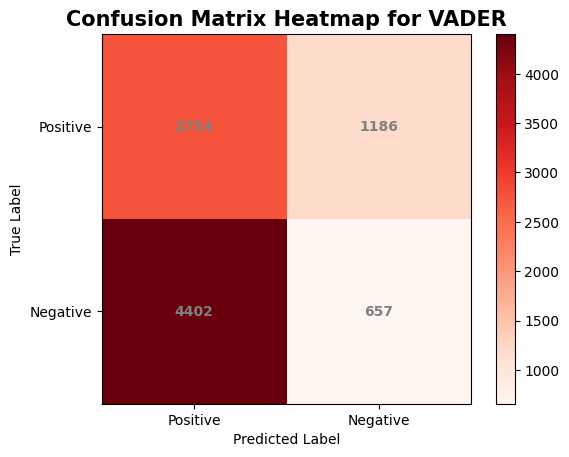

In [32]:
# Confusion Matrix for Vader

import matplotlib.pyplot as plt
# Define confusion matrix
conf_matrix = np.array([[total_TP_v, total_FN_v], [total_FP_v, total_TN_v]]) 

# Plot heatmap
plt.imshow(conf_matrix, cmap='Reds', interpolation='nearest')

# Add color bar
plt.colorbar()

# Add annotations
for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix[i])):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='grey', fontsize=10, fontweight='bold')
# Add labels
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap for VADER', fontsize=15, fontweight='bold')

# Customize tick marks
tick_marks = np.arange(len(conf_matrix))
plt.xticks(tick_marks, ['Positive', 'Negative'])
plt.yticks(tick_marks, ['Positive', 'Negative'])

# Show plot
plt.show()